In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

## Exercise 1. Firing rate estimation and convolution.

In [2]:
spikes = np.loadtxt('ExampleSpikeTimes1.dat')
t_stim = np.array(4) # s
t_res = np.array(0.1e-3) # s

### a) Plot the raw spike train.

In [3]:
def plot_spikes(spikes,t_stim):
    plt.eventplot(spikes/1000)
    plt.ylim([0.5,1.7])
    plt.xlim([0,t_stim]);
    plt.title('Raw spike data')
    plt.xlabel('Time (s)')
    plt.ylabel('Spikes')
    plt.yticks([])

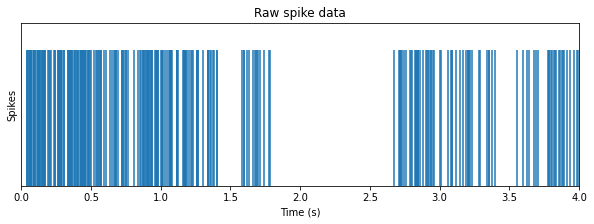

In [4]:
fig = plt.figure(figsize=(10,3))
plot_spikes(spikes,t_stim)

### b) Construct spike-count histograms.

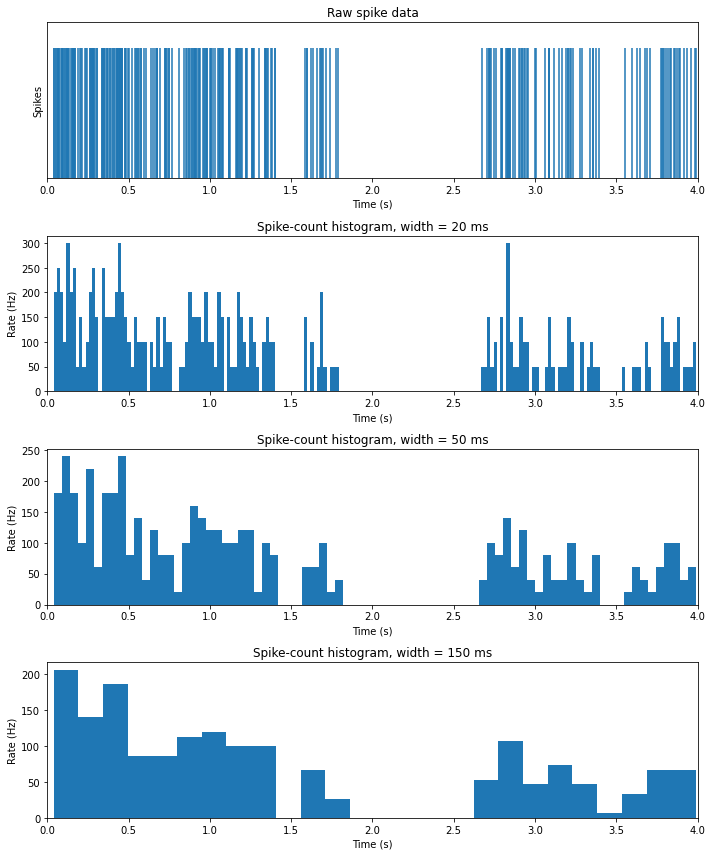

In [5]:
fig = plt.figure(figsize=(10,12))

widths = [0.02,0.05,0.15]
fig.add_subplot(4,1,1)
plot_spikes(spikes,t_stim)

for i in range(0,len(widths)):
    fig.add_subplot(4,1,i+2)             
    bin_num = np.int(t_stim/widths[i])
    weights = np.ones(len(spikes))/widths[i]
    plt.hist(spikes/1000,bins=bin_num,weights=weights);
    plt.xlim([0,t_stim]);
    plt.title('Spike-count histogram, width = '+str(np.int(widths[i]*1000))+' ms')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
fig.tight_layout()

### c) Approximate firing rates convoluting the spike train with different windows.

In [6]:
# Create the spike train in a time domain.
spike_conv=np.zeros(np.int(t_stim/t_res))
pos = (spikes*10).astype(np.int64)
spike_conv[pos] = 1
times = np.linspace(0,t_stim,len(spike_conv))

#### i) Rectangular window

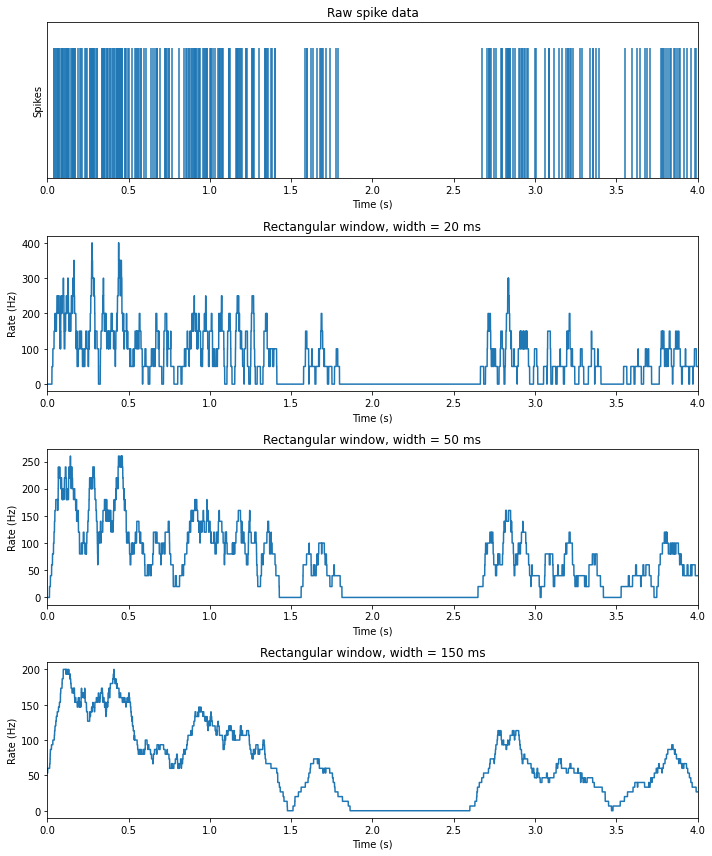

In [7]:
fig = plt.figure(figsize=(10,12))

fig.add_subplot(4,1,1)
plot_spikes(spikes,t_stim)

for i in range(0,len(widths)):
    fig.add_subplot(4,1,i+2)             
    rect_wind = np.ones(np.int(widths[i]/t_res))/widths[i]
    rect = np.convolve(spike_conv,rect_wind,mode='same')
    plt.plot(times,rect)
    plt.title('Rectangular window, width = '+str(np.int(widths[i]*1000))+' ms')
    plt.xlim([0, t_stim])
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
fig.tight_layout()

#### ii) Gaussian window.

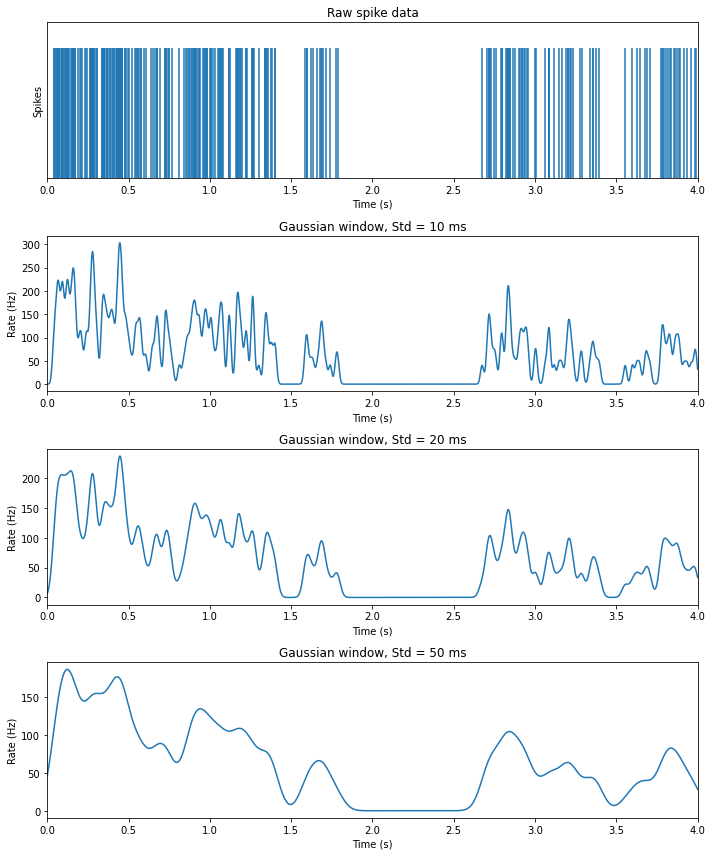

In [8]:
fig = plt.figure(figsize=(10,12))

widths = [0.01,0.02,0.05]

fig.add_subplot(4,1,1)
plot_spikes(spikes,t_stim)

for i in range(0,len(widths)):
    fig.add_subplot(4,1,i+2)             
    gauss_wind = sp.windows.gaussian(np.int(t_stim/t_res), widths[i]/t_res)/(np.sqrt(2*np.pi)*widths[i])
    gauss = np.convolve(spike_conv,gauss_wind,mode='same')
    plt.plot(times,gauss)
    plt.title('Gaussian window, Std = '+str(np.int(widths[i]*1000))+' ms')
    plt.xlim([0, t_stim])
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
fig.tight_layout()

#### iii) Alpha function.

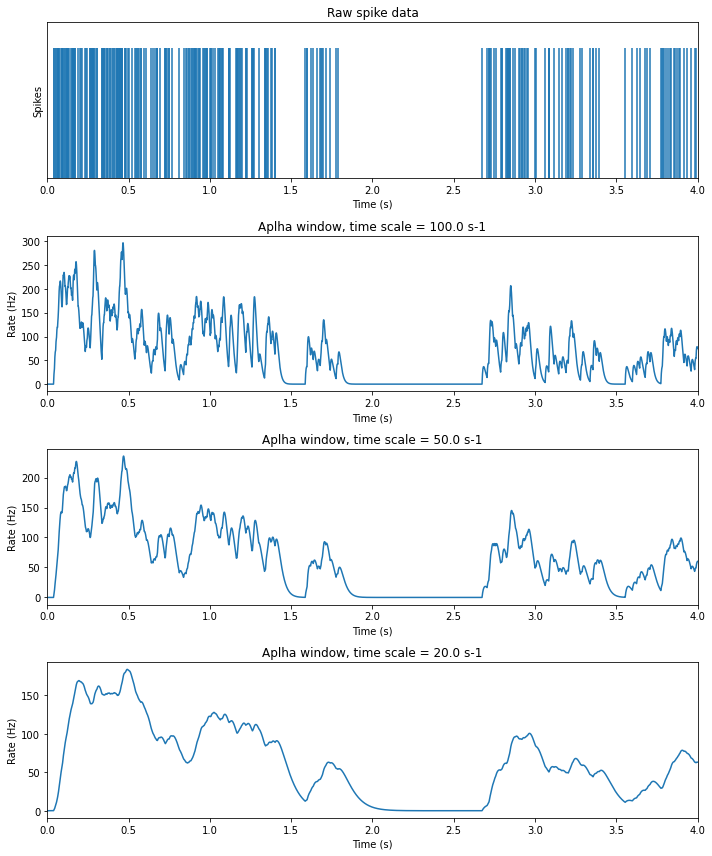

In [9]:
fig = plt.figure(figsize=(10,12))

fig.add_subplot(4,1,1)
plot_spikes(spikes,t_stim)

for i in range(0,len(widths)):
    fig.add_subplot(4,1,i+2)  
    
    alpha = 1/widths[i]
    times1 = np.arange(-1/t_res,1/t_res)*t_res
    alpha_func = alpha**2*times1*np.exp(-alpha*times1)
    alpha_func[alpha_func<0] = 0
    
    alpha_p = np.convolve(spike_conv,alpha_func,mode='same')
    plt.plot(times,alpha_p)
    plt.title('Aplha window, time scale = '+str(alpha) + ' s-1')
    plt.xlim([0, t_stim])
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
fig.tight_layout()

### d) Calculate the spike count-rate.

In [10]:
spike_count_r = len(spikes)/t_stim
print('The spike count rate is ' + str(spike_count_r)+' Hz.')

The spike count rate is 65.0 Hz.


## Exercise 2. Extra: estimation of firing rate and trial averaging.

### a) Estimate firing rates for the new spike data.

In [11]:
spikes2 = np.loadtxt('ExampleSpikeTimes2.dat')
t_stim2 = np.array(10) # s
t_res = np.array(0.1e-3) # s

# Create the spike train in a time domain.
spike_conv2=np.zeros(np.int(t_stim2/t_res))
pos2 = (spikes2*10).astype(np.int64)
spike_conv2[pos2] = 1
times2 = np.linspace(0,t_stim2,len(spike_conv2))

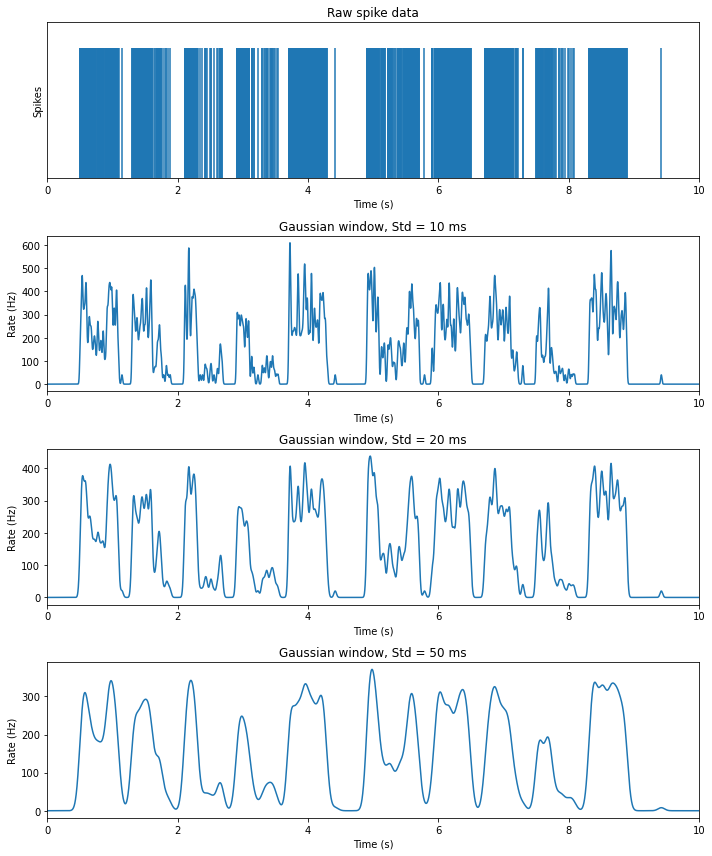

In [12]:
fig = plt.figure(figsize=(10,12))

widths = [0.01,0.02,0.05]

fig.add_subplot(4,1,1)
plot_spikes(spikes2,t_stim2)

for i in range(0,len(widths)):
    fig.add_subplot(4,1,i+2)             
    gauss_wind2 = sp.windows.gaussian(np.int(t_stim2/t_res), widths[i]/t_res)/(np.sqrt(2*np.pi)*widths[i])
    gauss2 = np.convolve(spike_conv2,gauss_wind2,mode='same')
    plt.plot(times2,gauss2)
    plt.title('Gaussian window, Std = '+str(np.int(widths[i]*1000))+' ms')
    plt.xlim([0, t_stim2])
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
fig.tight_layout()

It can be seen that the same code as before can be used, resulting in the same calculation.